In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
raw_data = pd.read_csv('dataset_school.csv')

In [3]:
raw_data

,Score,School
0,123,No
1,176,No
2,193,Yes
3,189,Yes
4,183,Yes
...,...,...
94,149,No
95,197,Yes
96,184,Yes
97,155,No


Changing Yes/No into 1/0: 

In [4]:
data = raw_data.copy()
data['School'] = data['School'].map({'Yes':1, 'No':0})

In [5]:
data

,Score,School
0,123,0
1,176,0
2,193,1
3,189,1
4,183,1
...,...,...
94,149,0
95,197,1
96,184,1
97,155,0


In [6]:
y = data['School']

In [7]:
x1 = data['Score']

#### Let's check with linear regression: 

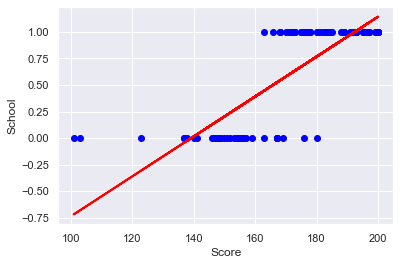

In [8]:
x = sm.add_constant(x1)
reg_lin=sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y, color='blue')
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2,color="red")
plt.xlabel("Score")
plt.ylabel("School")
plt.show()

#### And logistic regression:

In [9]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.174638
         Iterations 9


In [10]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 School   No. Observations:                   99
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                  0.7449
Time:                        00:56:31   Log-Likelihood:                -17.289
converged:                       True   LL-Null:                       -67.766
Covariance Type:            nonrobust   LLR p-value:                 9.420e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.2879     11.368     -4.072      0.000     -68.568     -24.008
Score          0.2767      0.067      4.109      0.000       0.145       0.409
==============================================================================
"""

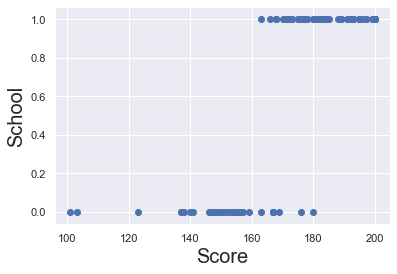

In [11]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Score', fontsize = 20)
plt.ylabel('School', fontsize = 20)
plt.show()